# Experiment 7.1

##  Implement and demonstrate  Single, Multi variable and Polynomial Regression for a given set of training data stored in a .CSV file and evaluate the accuracy.

Actual values: [95 86 17 69 42 75 54 27 62]
Predicted values: [90.05323389 79.0394557  11.95553405 75.03444546 33.98309041 86.04822364
 49.00187884 32.98183785 60.01565703]


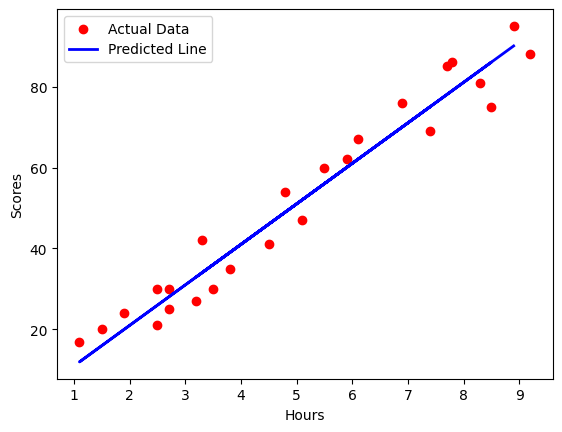

Mean Squared Error: 42.8684601892673
Predicted Value for 5.2: [53.00688909]


C:\Users\venki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
from sklearn.linear_model import LinearRegression  # For the linear regression model
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import mean_squared_error  # For evaluating the model

# Load data from CSV file
df = pd.read_csv('./00 Lab_files/Student.csv')

# Select features and target
x = df.iloc[:,:-1]  # Features
y = df.iloc[:, -1]  # Target

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)
print('Actual values:', y_test.values)
print('Predicted values:', y_pred)

# Plot data and predictions
plt.scatter(x, y, color='red', label='Actual Data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(x_test, y_pred, color='blue', linewidth=2, label='Predicted Line')
plt.legend()
plt.show()

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Predict value for a new data point
y1 = model.predict([[5.2]])
print('Predicted Value for 5.2:', y1)


# Following are Additional Things, Not Required in Experiment

 ## Evaluate R-squared Score

In [3]:
r_squared = model.score(x_test, y_test)
print(f'R-squared Score: {r_squared:.2f}')

R-squared Score: 0.93


# Visualize Training vs. Testing Data

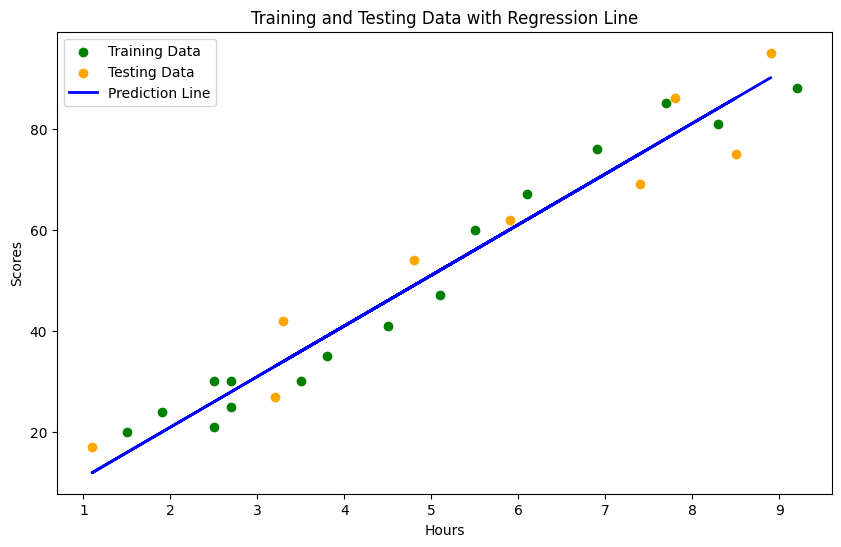

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='green', label='Training Data')
plt.scatter(x_test, y_test, color='orange', label='Testing Data')
plt.plot(x_test, y_pred, color='blue', linewidth=2, label='Prediction Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Training and Testing Data with Regression Line')
plt.legend()
plt.show()

# Residual Plot

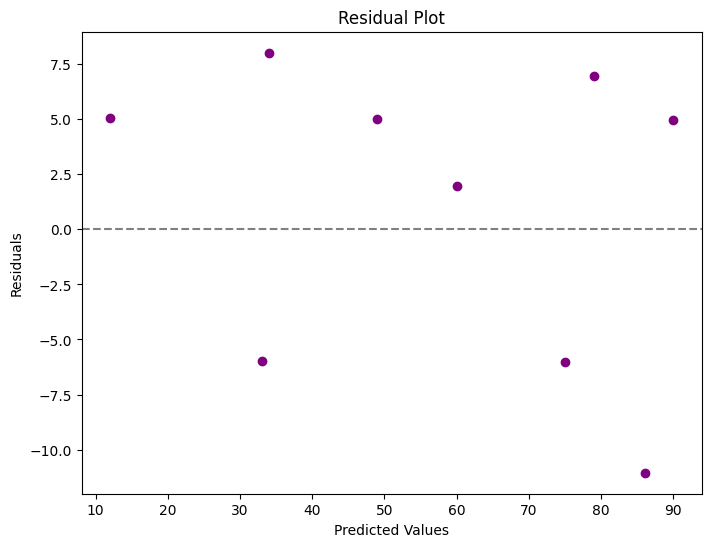

In [5]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Distribution of Residuals

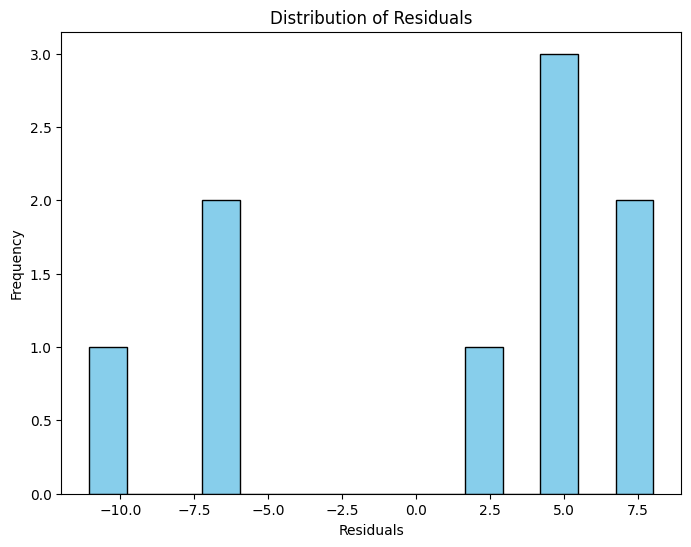

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Mean Absolute Error (MAE)

In [7]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 6.11


# Predict Multiple Values at Once

C:\Users\venki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


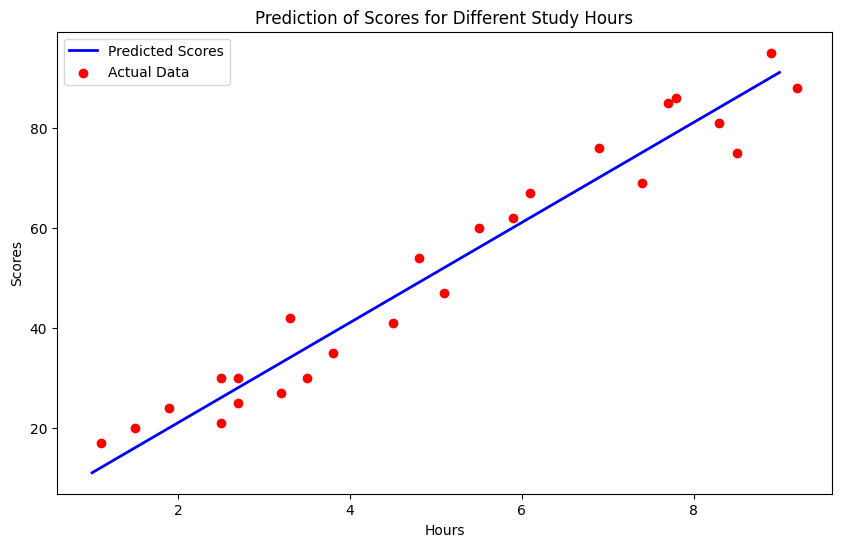

In [8]:
hours = [[i] for i in range(1, 10)]
predicted_scores = model.predict(hours)

plt.figure(figsize=(10, 6))
plt.plot(hours, predicted_scores, color='blue', linewidth=2, label='Predicted Scores')
plt.scatter(x, y, color='red', label='Actual Data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.title('Prediction of Scores for Different Study Hours')
plt.show()